## Bank Customer Segmentation
<h2 style="font-weight:bold; font-family:sans-serif"><b>Goal of creating this Notebook</h2>

1. Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
2. Perform Location-wise analysis to identify regional trends in India
3. Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
4. Customer Recency, Frequency, Monetary analysis

**Table of contents of this notebook:**

**1.** Importing Necessary Libraries<br>
**2.** Data Collection<br>
**3.** Data Cleaning<br>
**4.** Exploratory Data Analysis

<h2  style="text-align: center; padding: 20px; font-weight:bold">1. Importing Libraries</h2>

In [3]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

<h2  style="text-align: center; padding: 20px; font-weight:bold">2. Data Collection</h2><a id = "2"></a>

In [4]:
def import_data():
    """
    Imports our relative path Dataset and in addition to that, renames the TransactionAmount (INR) column in TransactionAmount, 
    this in order to avoid that in the future the special characters of the original name give us problems.
    
    Returns:
        DataFrame: dfGet source data
    """
    dfGet = pd.read_csv("../data/bank_transactions.csv")
    dfGet = dfGet.rename(columns={'TransactionAmount (INR)':'TransactionAmount'})
    return dfGet
df = import_data()
# Showing or Checking results
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [6]:
def dfInformation(dataframe):
    """
    Gets the initial information of the Dataset, the number of records, number of variables, non-null objects and data type.

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :return: A range indes conforma by float64(2), int64(1), object(6)
    :rtype: void
    """
    display(dataframe.info())
dfInformation(df)
# Getting the dataframe size for following amortized values
initialRows = len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   TransactionID       1048567 non-null  object 
 1   CustomerID          1048567 non-null  object 
 2   CustomerDOB         1045170 non-null  object 
 3   CustGender          1047467 non-null  object 
 4   CustLocation        1048416 non-null  object 
 5   CustAccountBalance  1046198 non-null  float64
 6   TransactionDate     1048567 non-null  object 
 7   TransactionTime     1048567 non-null  int64  
 8   TransactionAmount   1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


None

<h2  style="text-align: center; padding: 20px; font-weight:bold">3. Data Cleaning</h2><a id = "3"></a>

In [7]:
def check(dataframe):
    """
    Gets the amount of null data and unique is calculated

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :return: A new Dataframe tha represents de amortized values of null and unique values for each column.
    :rtype: pandas.DataFrame
    """
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check 
check(df)

,Column,Types,Unique,Nulls
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount,float64,93024,0


<b>Observation:</b><h6>The amount of null values to eliminate is equal to 6953 data, we eliminate these values because they do not represent more than 0.7% of the total data. <br> We check if there are repeated elements in our DataSet</h6>

In [9]:
def removeNullValues(dataframe):
    """
    Removes null values from data source and calculates the amount eliminated

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :return: The total of null values already deleted
    :rtype: int
    """
    shapeInitial = dataframe.shape[0]
    dataframe.dropna(inplace=True)
    return shapeInitial-dataframe.shape[0]

print("Amount to remove " + str(removeNullValues(df)))

Amount to remove 6953


In [13]:
def checkDuplicates(dataframe):
    """
    Checks duplicated values for each column and amortized this count.

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :return: The total of duplicated values in an specifica dataframe
    :rtype: int
    """
    return dataframe.duplicated().sum()
checkDuplicates(df)

0

<b>Consideration</b>
<h6>The CustomerDOB column is analyzed because it may contain atypical data.
<br>
We analyze the number of records for each client's date of birth.</h6>

In [14]:
def uniqueRows(dataframe, column):
    """
    Getting distinct values from column or specific variable

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :param column: Variable or column in dataframe
    :type dataframe: string
    :return: A series containing counts of unique rows in the DataFrame.
    :rtype: Series
    """
    return dataframe[column].value_counts()
uniqueRows(df,'CustomerDOB')

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

<b>Take in mind</b>
<h6>Dates 1/1/1800 are deleted because it is not possible to define whether they are children, adults or persons without date of birth. This is an important variable for the business, for this reason we cannot make assumptions that bias the project, for this reason, it is better to eliminate these outliers or erroneously measured data.</h6>

In [15]:
def removeValues(dataframe,column, value):
    """
    Removes an specific value from a source column in a dataframe

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :param column: Variable or column in dataframe
    :type dataframe: string
    :param value: Value with column type
    :type dataframe: any
    :return: A pandas DataFrame already modified.
    :rtype: pandas.DataFrame
    """
    return dataframe.loc[~(dataframe[column] == value)]

df = removeValues(df,'CustomerDOB','1/1/1800')
# Cheking distinct values from dataframe
uniqueRows(df,'CustomerDOB')

1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
23/2/05       1
28/11/42      1
23/9/49       1
14/3/40       1
24/10/44      1
Name: CustomerDOB, Length: 17232, dtype: int64

In [21]:
def minAndMax(dataframe, column):
    """
    Gets the minimum and maximum values of any column in order to see in which range the values in this column oscillate.

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :param column: Variable or column in dataframe
    :type dataframe: string
    :return: Shows the minimun and maximun values from this column
    :rtype: void
    """
    print("min: " + str(dataframe[column].min()) + " max: " + str(dataframe[column].max()))
minAndMax(df,'CustomerDOB')

min: 1973-01-01 00:00:00 max: 2072-12-31 00:00:00


It can be seen that the person with the oldest birth date has a date of January 1, 1900 and the youngest person has a date of September 9, 1997. (It looks weird)

Convert type of columns TransactionDate, CustomerDOB from string to datetime, this convertation will be in the format of dayfirst, so the date will be DD/MM/YY

In [18]:
def dateConvertion(dataframe, column):
    """
    Converts dataframe column to datetime format using pandas tool with specific format 'dayfirst'

    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :param column: Variable or column in dataframe
    :type dataframe: string
    :return: New Dataframe already modified
    :rtype: pandas.DataFrame
    """
    return pd.to_datetime(dataframe[column], dayfirst=True)
df['CustomerDOB'] = dateConvertion(df,'CustomerDOB')

Now we will check if the conversion was as expected and in the required format.

In [22]:
# Checking converting problem of to_datetime pandas function
minAndMax(df,'CustomerDOB')

min: 1973-01-01 00:00:00 max: 2072-12-31 00:00:00


We can see that the most "recent" date is December 31, 2072, but it is illogical because this is a future date, so we subtract 100 from all values greater than 1999 to get the real value. (This is a problem Pandas has when converting a date).

In [28]:
def refactorDates(dataframe):
    """
    Refactors date dob column substrating 100 from values greater than 1999
    Note: Fixing the problem base on analysis above
    :param dataframe: Source dataset.
    :type dataframe: pandas.DataFrame
    :return: New Dataframe already modified
    :rtype: pandas.DataFrame
    """
    dataframe.loc[df['CustomerDOB'].dt.year > 1999, 'CustomerDOB'] -= pd.DateOffset(years=100)
    return dataframe
df = refactorDates(df)
minAndMax(df,'CustomerDOB')

SyntaxError: invalid syntax (2523352136.py, line 10)

In the same way that we converted the CustomerDOB column, we convert the TransactionDate column with the same expected format as the first day.

In [26]:
# Using pandas convert to datetime tool for TransactionDate variable
df['TransactionDate'] = dateConvertion(df,'TransactionDate')
# Checking range of TransactionDate variable
minAndMax(df,'TransactionDate')

min: 2016-08-01 00:00:00 max: 2016-10-21 00:00:00


All the trnasactions took place in a roughly two month period from August to October, this could account for the low transaction frequency

Once all the unnecessary data for the study has been eliminated, we can see the following summary, which shows us how much data we lost and what is the percentage of loss obtained

In [27]:
print(" Number of initial rows: ", initialRows, "\n",
"Number of rows after: ", df.shape[0], "\n",
"Number of rows deleted: ", initialRows - df.shape[0], "\n",
"Percentage of rows deleted: ", (initialRows - df.shape[0]) / initialRows * 100, "%")

 Number of initial rows:  1048567 
 Number of rows after:  985322 
 Number of rows deleted:  63245 
 Percentage of rows deleted:  6.03156498344884 %


We can see that we lost <b>6.03%</b> of the data, although what is expected <b>by theory is to lose less than 5%</b> in this case we must ignore this metric because there are null values and measurement failure errors that <b>force us to eliminate them</b>, because we cannot speculate about them.

<h2  style="text-align: center;padding: 20px;font-weight:bold">4. Exploratory Data Analysis</h2><a id = "4"></a>

Determine minority group of people aged <b> over 100 years</b>

1900-04-11    18
1902-03-31    18
1903-02-19    18
1901-09-22    18
1907-01-02    16
              ..
1913-10-22     1
1913-02-04     1
1905-02-23     1
1903-03-07     1
1915-11-18     1
Name: CustomerDOB, Length: 254, dtype: int64
254


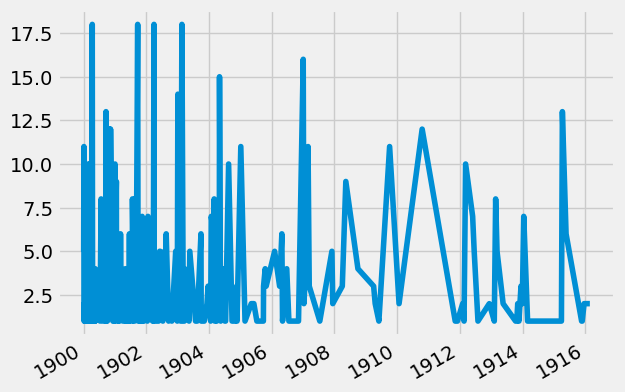

In [15]:
# We filter our dataframe specifically on the DOB column to make a decision regarding date ambiguity.
df_filtered = df["CustomerDOB"].apply(lambda x: x if x.year < 1917 else 0)
# Amortizing and removing values ​​greater than 1917 represented as 0
counts = df_filtered.value_counts().drop(0)
print(counts)
# Amount of customer in this age range
print(len(counts))
# Plot the amortized
counts.plot()
plt.show()
del df_filtered

<h3><b>Calculate customer age :</b></h3>
<b>CustomerDOB:</b> is the birth date of the customer 
<br>
<b>TransactionDate:</b> is the date of transaction that customer is done
<br>
The age calculation is done by <b>subtracting</b> the TransactionDate from the CustomerDOB.


In [16]:
# Getting the customer age at transaction moment and adding a new column in our dataframe
df['CustomerAge'] = (df['TransactionDate'] - df['CustomerDOB'])/np.timedelta64(1, 'Y')
df['CustomerAge'] = df['CustomerAge'].astype(int)
# Checking range of CustomerAge variable
print("min: " + str(df['CustomerAge'].min()) + " max: " + str(df['CustomerAge'].max()))

min: 16 max: 116


Once this is obtained, we have that the minimum age is equal to 16 years and the maximum age is equal to 116 years, it should be noted that the ages over 100 are a minimum percentage.

We obtain the percentage between customers who are women and men.

In [17]:
# Getting distinct values from CustGender variable
df.CustGender.value_counts()

M    712454
F    272868
Name: CustGender, dtype: int64

<h5> Visualize the distribution of the numeric data and detect posible outliers. Boxplots show the median, quartiles, and extreme values ​​of the data, and points that are above or below the extreme values ​​are considered outliers.</h5>

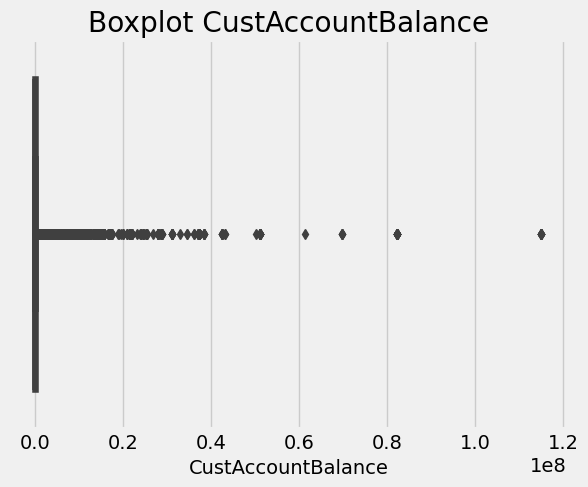

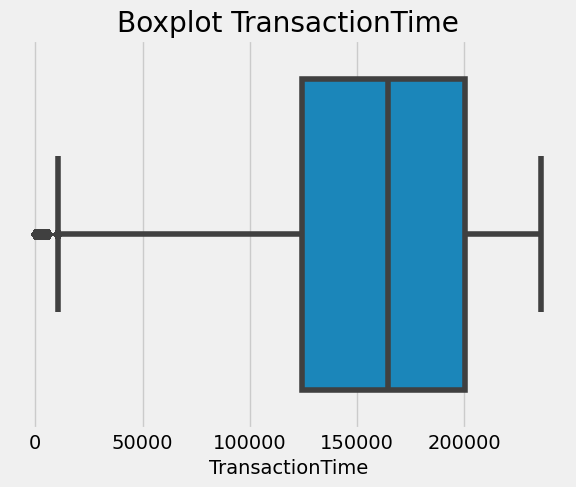

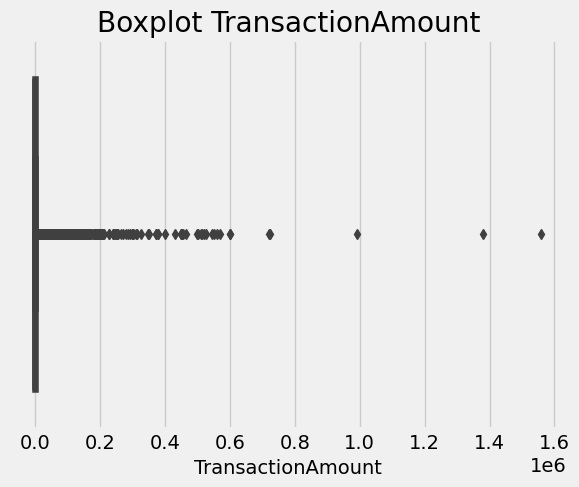

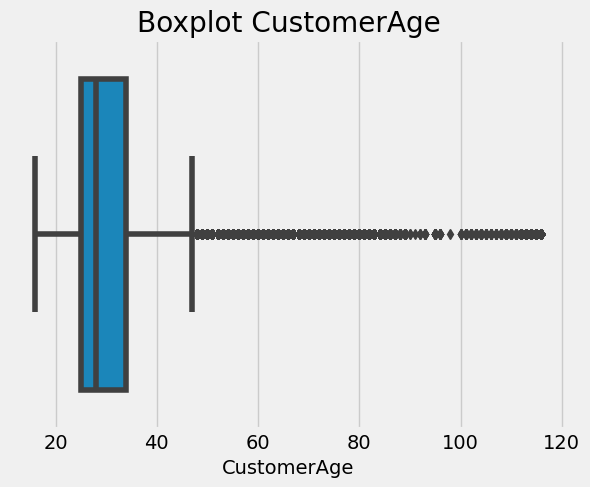

In [24]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)

for i in num_col.columns:
    sns.boxplot(x=num_col[i])
    plt.title("Boxplot " + i)
    plt.show()

<h3 style="font-family:Sans-Serif; font-weight:bold">RFM Metrics:</h3>
<ul>
<li><b>Recency: </b>The freshness of customer activity e.g. time since last activity</li>
<li><b>Frequency: </b>The requency of customer transactions e.g. the totla number of recorded transactions</li>
<li><b>Monetary: </b>The willingness to spend e.g. the thoal transaction value</li>
</ul>

<p>Those two articles will help you to understand this topic:</p>
<a href="https://connectif.ai/en/what-are-rfm-scores-and-how-to-calculate-them/">What Are RFM Scores and How To Calculate Them</a>
<br>
<a href="https://www.datacamp.com/tutorial/introduction-customer-segmentation-python">Introduction to Customer Segmentation in Python</a>

We prepare some columns to make the RFM table

In [25]:
df['TransactionDate1']=df['TransactionDate'] # ==> to calculate the minimum (first transaction)
df['TransactionDate2']=df['TransactionDate'] # ==> to calculate the maximum (last transaction)

Este código es utilizado para crear una tabla RFM (Recency, Frequency, Monetary)
Se agrupan los datos por CustomerID utilizando el método groupby y luego se utiliza la función agg para calcular distintas métricas para cada cliente.

Las métricas que se calculan son las siguientes:
<ul>
<li><b>TransactionID:</b> cantidad de transacciones realizadas por el cliente.</li>
<li><b>CustGender:</b> género del cliente (tomado de la primera transacción registrada para el cliente).</li>
<li><b>CustLocation:</b> ubicación del cliente (también tomada de la primera transacción registrada para el cliente).</li>
<li><b>CustAccountBalance:</b> saldo promedio de la cuenta del cliente.</li>
<li><b>TransactionTime:</b> hora promedio de las transacciones realizadas por el cliente.</li>
<li><b>TransactionAmount:</b> monto promedio de las transacciones realizadas por el cliente.</li>
<li><b>CustomerAge:</b> edad mediana del cliente.</li>
<li><b>TransactionDate2:</b> fecha más reciente en la que el cliente realizó una transacción.</li>
<li><b>TransactionDate1:</b> fecha más antigua en la que el cliente realizó una transacción.</li>
<li><b>TransactionDate:</b> fecha mediana en la que el cliente realizó una transacción.</li>
</ul>

In [26]:
#Creating MRF Table Strategy
RFM_df = df.groupby("CustomerID").agg({
                                        "TransactionID" : "count",
                                        "CustGender" : "first",
                                        "CustLocation":"first",
                                        "CustAccountBalance"  : "mean",
                                        "TransactionTime": "mean",
                                        "TransactionAmount" : "mean",
                                        "CustomerAge" : "median",
                                        "TransactionDate2":"max",
                                        "TransactionDate1":"min",
                                        "TransactionDate":"median"
                        })

RFM_df = RFM_df.reset_index()
RFM_df.head()

,CustomerID,TransactionID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,TransactionDate2,TransactionDate1,TransactionDate
0,C1010011,2,F,NOIDA,76340.635,67521.0,2553.0,28.5,2016-09-26,2016-08-09,2016-09-02
1,C1010012,1,M,MUMBAI,24204.490,204409.0,1499.0,22.0,2016-08-14,2016-08-14,2016-08-14
2,C1010014,2,F,MUMBAI,100112.950,187378.0,727.5,27.5,2016-08-07,2016-08-01,2016-08-04
3,C1010018,1,F,CHAMPARAN,496.180,170254.0,30.0,26.0,2016-09-15,2016-09-15,2016-09-15
4,C1010024,1,M,KOLKATA,87058.650,141103.0,5000.0,51.0,2016-08-18,2016-08-18,2016-08-18


Now we calculate the number of records we have left after grouping by CustomerID

In [27]:
# After Grouping by CustomerID
RFM_df.shape

(839081, 11)

The ID of the customer is irrelevant to solve our problem, so we decided to remove it

In [28]:
# The id of the customer is irrelevant
RFM_df.drop(columns=["CustomerID"],inplace=True)

<h4><b>Frequency</b></h4>
<p>As we count the TransactionID column, we can replace the name of this column by Frequency, because this is the number of times a customer has made a transaction.</p>

In [29]:
# Renaming specific column adapting to problem goal and replacing with inplace property of function
RFM_df.rename(columns={"TransactionID":"Frequency"},inplace=True)

<h4><b>Recency</b></h4>
<p>The recency is the number of days since the last purchase or order so we will create a new column of TransactionDate to subtract the last transaction from the first transaction</p>

In [30]:
# Getting Recency that is by definition: number of days since the last purchase or order
RFM_df['Recency']=RFM_df['TransactionDate2']-RFM_df['TransactionDate1']
# Conversion from timedelta64[ns] to string representtion in days of weeks of Recency variable
RFM_df['Recency']=RFM_df['Recency'].astype(str)

We apply a lambda function to adjust the format of our output in the Recency variable

In [31]:
# Using re library for apply an regular expresion in each value of Recency column for extract the number of days in this string representation. 
RFM_df['Recency']=RFM_df['Recency'].apply(lambda x :re.search('\d+',x).group())
# Conversion from string '18' to int representtion for folloeing operations
RFM_df['Recency']=RFM_df['Recency'].astype(int)

<p> <b>Appreciation:</b> Days mean that a customer has done transaction recently one time by logic so I will convert 0 to 1 </p>

In [32]:
# Transformation of 0 days base on business meaning
RFM_df['Recency'] = RFM_df['Recency'].apply(lambda x: 1 if x == 0 else x)

The TransactionDate1 and TransactionDate2 columns have already fulfilled their objectives, which is to calculate the Recency, we can eliminate these columns.

In [33]:
# Columns that were only needed for the calculation we eliminated
RFM_df.drop(columns=["TransactionDate1","TransactionDate2"],inplace=True)

Now, let's see if our DataSet once cleaned contains atypical data

In [34]:
# To calculate the otliers for each feature
lower_list=[]
upper_list=[]
num_list=[]
perc_list=[]
cols=['Frequency', 'CustAccountBalance','TransactionAmount', 'CustomerAge', 'Recency']
for i in cols:
    Q1 = RFM_df[i].quantile(0.25)
    Q3 = RFM_df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Calculate number of outliers
    num=RFM_df[(RFM_df[i] < lower) | (RFM_df[i] > upper)].shape[0]
    # Calculate percentage of outliers
    perc = (num / RFM_df.shape[0]) * 100
    lower_list.append(lower)
    upper_list.append(upper)
    num_list.append(num)
    perc_list.append(round(perc,2))

    
dic={'lower': lower_list, 'upper': upper_list, 'outliers': num_list, 'Perc%':perc_list }
outliers_df=pd.DataFrame(dic,index=['Frequency', 'CustAccountBalance','TransactionAmount', 'CustomerAge', 'Recency'])
outliers_df

,lower,upper,outliers,Perc%
Frequency,1.000,1.000,128896,15.36
CustAccountBalance,-72439.305,135042.015,110026,13.11
TransactionAmount,-1313.595,2669.325,87229,10.40
CustomerAge,11.500,47.500,40804,4.86
Recency,1.000,1.000,122150,14.56


<h3 style="font-family:Sans-Serif; font-weight:bold">Observations:</h3>
<p>We will not remove outliers for the following two reasons: First, in boxplots those values ​​can be outliers because they represent points that are above or below extreme values. However, these were not measurement errors and are both true and significant, given that while customers 100+ do not represent a key demographic for most banks. Secoind it is important that banks are aware of the specific needs and challenges that these clients may face, and that they adapt their strategies accordingly.</p>

Now, let's go to see our RFM Table

In [35]:
RFM_df.head()

,Frequency,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,TransactionDate,Recency
0,2,F,NOIDA,76340.635,67521.0,2553.0,28.5,2016-09-02,48
1,1,M,MUMBAI,24204.490,204409.0,1499.0,22.0,2016-08-14,1
2,2,F,MUMBAI,100112.950,187378.0,727.5,27.5,2016-08-04,6
3,1,F,CHAMPARAN,496.180,170254.0,30.0,26.0,2016-09-15,1
4,1,M,KOLKATA,87058.650,141103.0,5000.0,51.0,2016-08-18,1


We describe each of the columns with different factors

In [36]:
RFM_df.describe()

,Frequency,CustAccountBalance,TransactionTime,TransactionAmount,CustomerAge,Recency
count,839081.000000,8.390810e+05,839081.000000,8.390810e+05,839081.000000,839081.000000
mean,1.174287,1.058545e+05,157446.381829,1.453624e+03,30.755438,3.666118
std,0.435129,7.862524e+05,49194.229430,6.045200e+03,8.706026,8.061373
min,1.000000,0.000000e+00,0.000000,0.000000e+00,16.000000,1.000000
25%,1.000000,5.366190e+03,125604.000000,1.800000e+02,25.000000,1.000000
50%,1.000000,1.768220e+04,163936.000000,4.750000e+02,29.000000,1.000000
75%,1.000000,5.723652e+04,194953.000000,1.175730e+03,34.000000,1.000000
max,6.000000,1.150355e+08,235959.000000,1.560035e+06,116.000000,81.000000


It creates a correlation matrix between the different features in the RFM table (RFM_df), and then plots this matrix as a heat map using it. The correlation matrix is a square matrix that shows how the different features are related to each other.

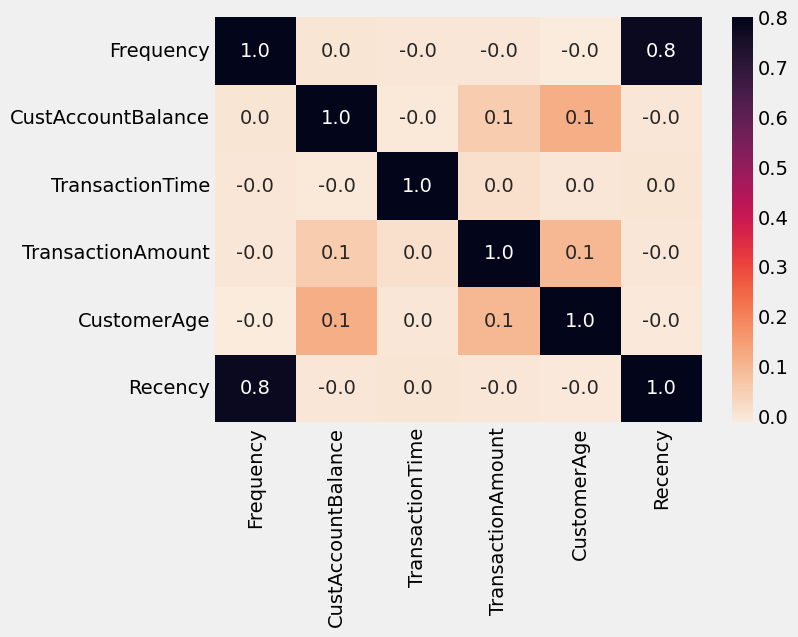

In [37]:
# correlation between features
plt.figure(figsize=(7,5))
correlation=RFM_df.corr(numeric_only=True)
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='rocket_r',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

We obtain the frequency bar chart, this chart shows the distribution of the variable Frequency, it is worth noting that the frequency is the number of times a customer has made transactions in the period from August to October.

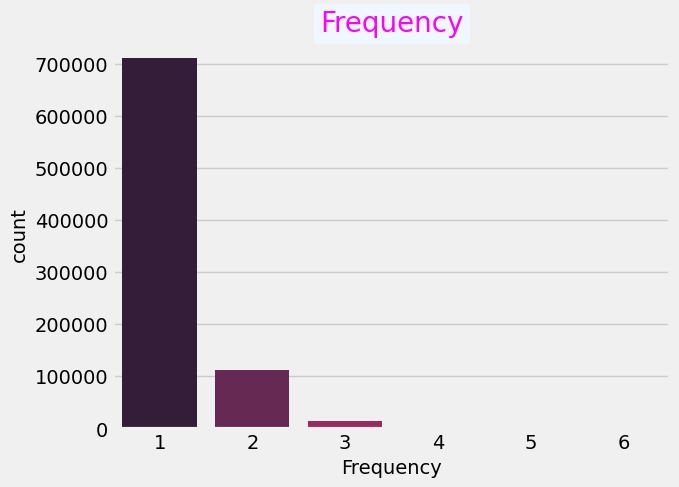

In [38]:
plt.style.use("fivethirtyeight")
chart=sns.countplot(x='Frequency',data=RFM_df,palette='rocket', order = RFM_df['Frequency'].value_counts().index)
plt.title("Frequency",
          fontsize='20',
          backgroundcolor='AliceBlue',
          color='magenta');

We obtain the age distribution of the clients and also the percentage of women and men in the records we have.

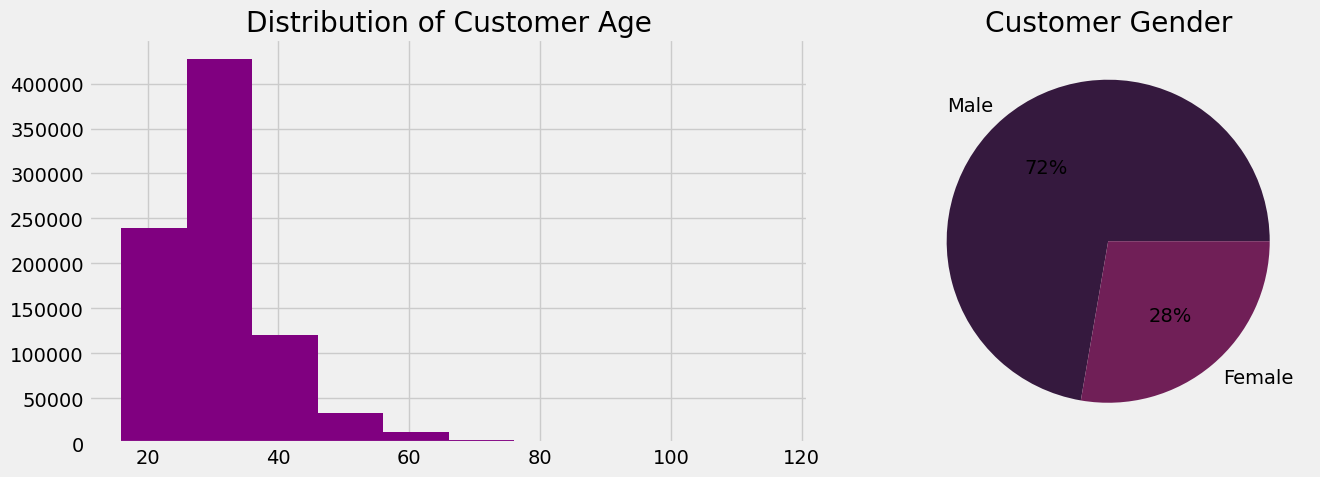

In [40]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
palette_color = sns.color_palette('rocket')
ax[0].hist(x=RFM_df['CustomerAge'],color='purple')
ax[0].set_title("Distribution of Customer Age")
ax[1].pie(RFM_df['CustGender'].value_counts(),autopct='%1.f%%',colors=palette_color,labels=['Male','Female'])
ax[1].set_title("Customer Gender")
plt.tight_layout();

In this graph we obtain the number of times a transaction was made in different areas of the country, only the top 20 locations with the most transactions made will be shown.

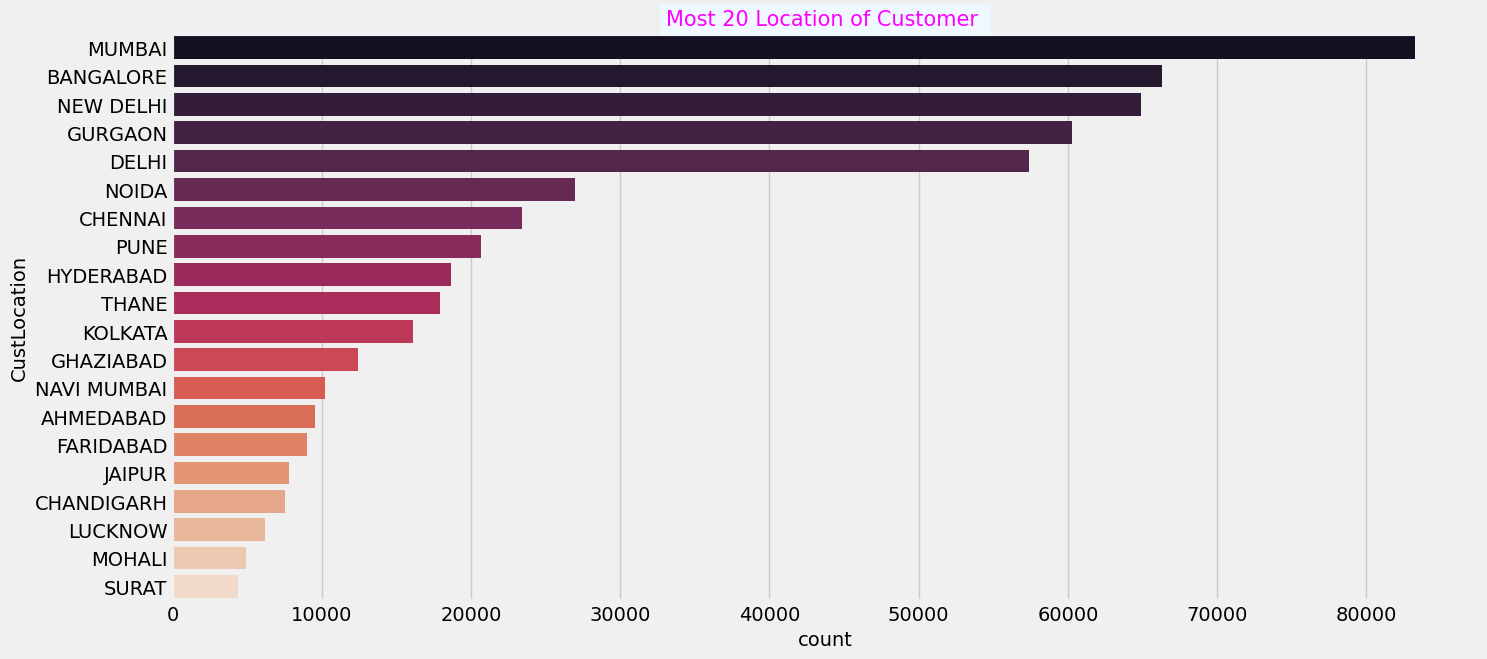

In [40]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,7))
chart=sns.countplot(y='CustLocation',data=RFM_df,palette='rocket', order = RFM_df['CustLocation'].value_counts()[:20].index)
plt.title("Most 20 Location of Customer ",
          fontsize='15',
          backgroundcolor='AliceBlue',
          color='magenta');

We generate the scatter plot of the data referring to the variable Frequency.

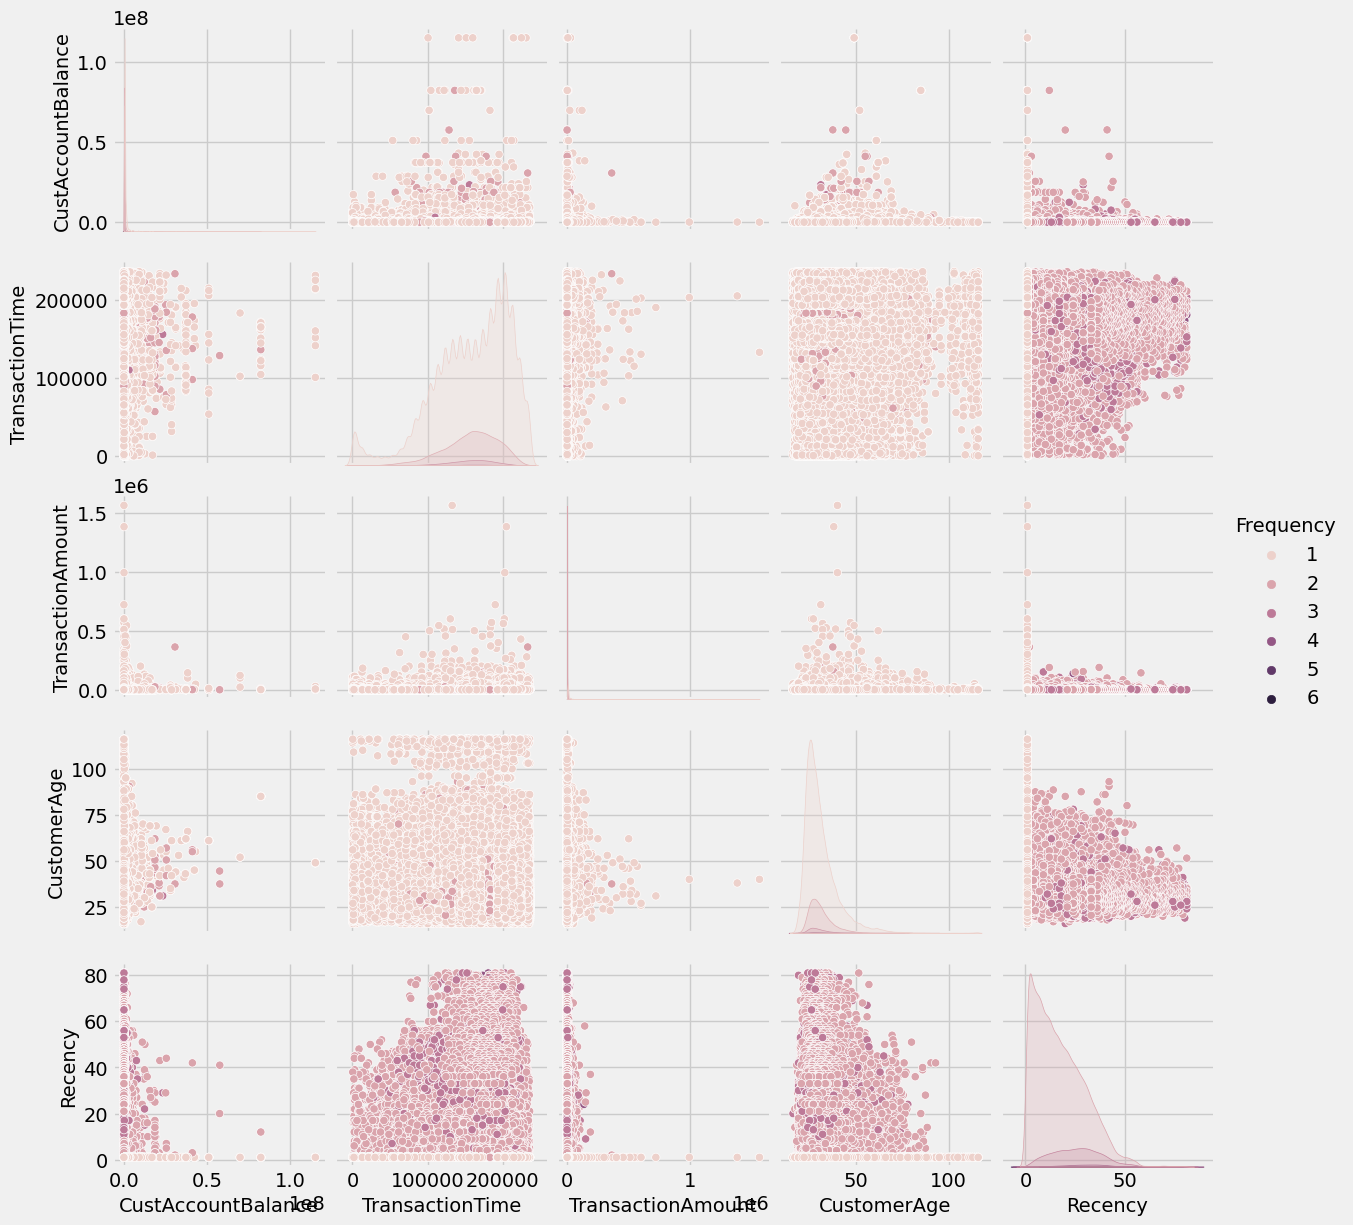

In [55]:
plt.style.use("fivethirtyeight")
sns.pairplot(RFM_df,hue='Frequency')

This code generates a scatter plot. The data used comes from the RFM_df dataframe and is represented on the X axis (horizontal) the transaction amounts (TransactionAmount) and on the Y axis (vertical) the customer's account balance (CustAccountBalance). We add a third dimension to the graph which is Frequency and a fourth one with Recency.

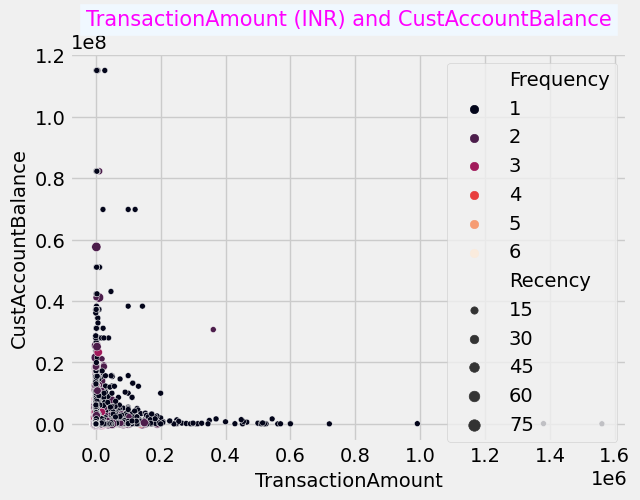

In [42]:
plt.style.use("fivethirtyeight")
sns.scatterplot(x='TransactionAmount',y='CustAccountBalance',data=RFM_df,palette='rocket',hue='Frequency',size='Recency' )
plt.legend(loc = "upper right")
plt.title("TransactionAmount (INR) and CustAccountBalance",
          fontsize='15',
          backgroundcolor='AliceBlue',
          color='magenta');

We calculate the farthest distance between two completed transactions

In [43]:
# difference between maximum and minimum date
RFM_df['TransactionDate'].max()-RFM_df['TransactionDate'].min()

Timedelta('81 days 00:00:00')

We group the transactions according to the month in which they were made and obtain the average for each table.

In [52]:
RFM_df=RFM_df.sort_values(by='TransactionDate')
groupbby_month = RFM_df.groupby([pd.Grouper(key='TransactionDate', freq='M')])[['Frequency', 'TransactionAmount', 'CustAccountBalance', 'TransactionTime', 'CustomerAge', 'Recency']].mean()
print(groupbby_month.shape)
groupbby_month

(3, 6)


,Frequency,TransactionAmount,CustAccountBalance,TransactionTime,CustomerAge,Recency
TransactionDate,,,,,,
2016-08-31,1.196796,1455.968945,106177.136987,156767.237318,30.780328,4.099551
2016-09-30,1.135252,1445.607858,105375.580700,158413.057073,30.710065,2.902352
2016-10-31,1.056486,1904.367370,94726.805639,185756.771718,30.884106,2.816907


We made line graphs of the information we obtained previously.

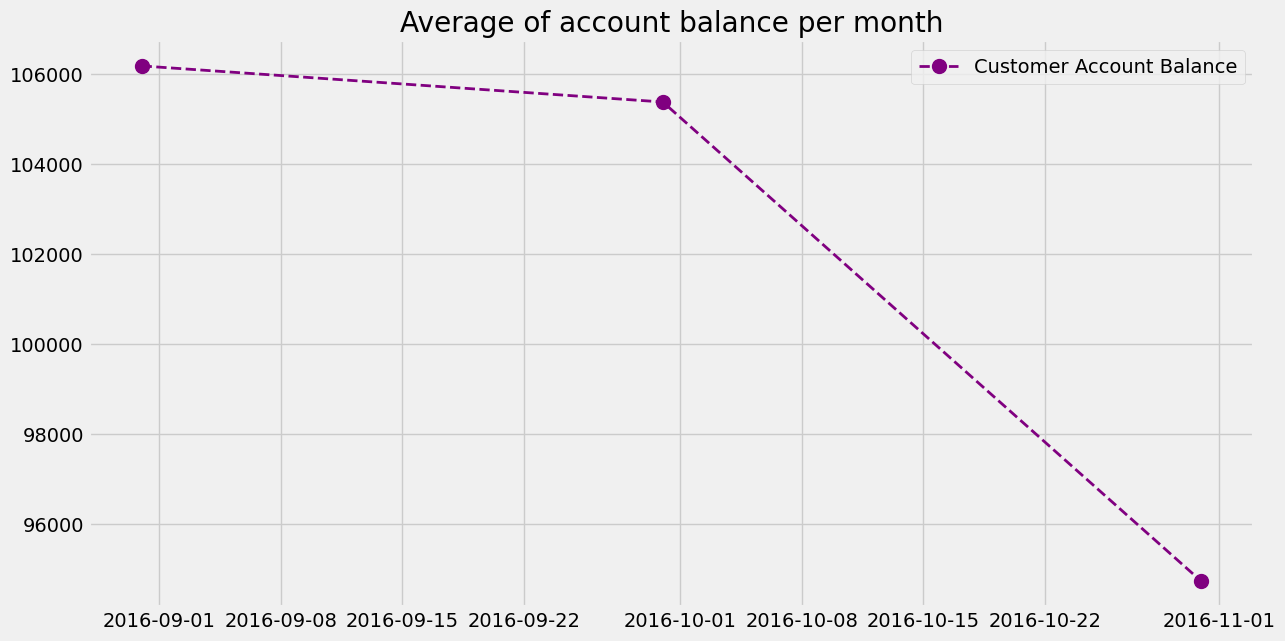

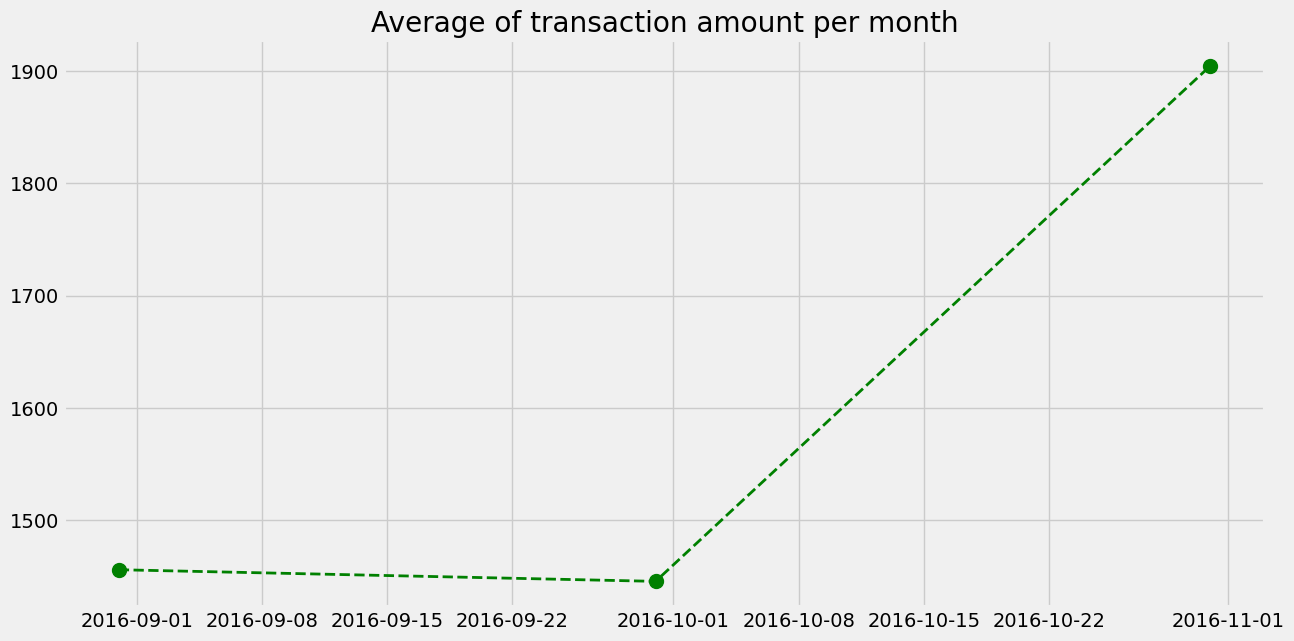

In [54]:
plt.figure(figsize=(13.4,7))
plt.title("Average of account balance per month")
plt.plot(groupbby_month.index,groupbby_month['CustAccountBalance'],color='purple',marker='o',label='Customer Account Balance', linestyle='dashed', linewidth=2, markersize=10)
plt.legend();

plt.figure(figsize=(13.8,7))
plt.title("Average of transaction amount per month")
plt.plot(groupbby_month.index,groupbby_month['TransactionAmount'],color='green',marker='o',label='Transaction Amount', linestyle='dashed', linewidth=2, markersize=10)